In [37]:
#Libraries
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def FileToDict(name):
    f = open(name,'r')
    f = f.read()
    import ast
    f = ast.literal_eval(f)
    return f
islam = FileToDict("Islam.txt")
christianity = FileToDict("Christianity.txt")


In [4]:
#remove christion 270
import random
for x in range(270):
    christianity.pop( random.choice(christianity.keys()) ) 

#Numbers on the users and  posts/comments

In [27]:
def getMeanContributions(inputDict):
    mean = 0
    for user in inputDict:
        mean += len(inputDict[user])
    return mean/len(inputDict)

#Total users
print "Total users:"
print "Islam: %d" %(len(islam))
print "Christianity: %d" %(len(christianity))
print "-------------"
print "Average contributions"
print "Islam: %d" %(getMeanContributions(islam))
print "Christianity: %d" %(getMeanContributions(christianity))

Total users:
Islam: 483
Christianity: 483
-------------
Average contributions
Islam: 45
Christianity: 52


#Creating an overview graph

In [28]:
Q = nx.Graph()

In [29]:
overviewDict = {}
def addToOverview(subredditDict, finalDict):
    for user in subredditDict:
        for subreddit in subredditDict[user]:
            if subreddit not in overviewDict:
                overviewDict[subreddit] = 1
            else:
                overviewDict[subreddit] += 1
addToOverview(islam, overviewDict)
addToOverview(christianity, overviewDict)


**Filtering low degree subreddits away**

In [30]:
overviewFinal = {}
for subreddit in overviewDict:
    if overviewDict[subreddit] >= 300:
        overviewFinal[subreddit] = overviewDict[subreddit]

In [31]:
for subreddit in overviewFinal:
    Q.add_node(subreddit, size=overviewFinal[subreddit])
Q.remove_node("Christianity")

<function matplotlib.pyplot.show>

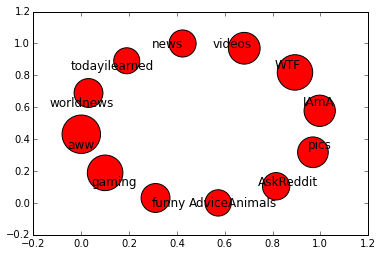

In [32]:
nx.draw_networkx_nodes(Q, pos=nx.spring_layout(Q), node_size=[Q.node[v]["size"]*2 for v in Q])
nx.draw_networkx_labels(Q, pos=nx.spring_layout(Q))
plt.show

#Creating the person to subreddit graph

In [2]:
G = nx.DiGraph()

NameError: name 'nx' is not defined

In [3]:
def AddUserToSubredditInGraph(graph, dictOfUsersWithSubreddits, nodeColor):
    for user in dictOfUsersWithSubreddits.keys():
        for subreddit in dictOfUsersWithSubreddits[user]:
            #graph.add_edge(user, subreddit)
            graph.add_node(user, color=nodeColor)
            graph.add_node(subreddit, color="g")
            graph.add_edge(user, subreddit)  

In [35]:
AddUserToSubredditInGraph(G, islam, "r")
AddUserToSubredditInGraph(G, christianity, "b")

**Filtering low in-degree subreddits away**

In [36]:
for x in G.nodes():
    if G.node[x]["color"] == "g":
        if G.in_degree(x) < 200:
            G.remove_node(x)
            #print G.in_degree(x)
for x in G.nodes():
    if G.node[x]["color"] != "g":
        if G.out_degree(x) < 1:
            G.remove_node(x)

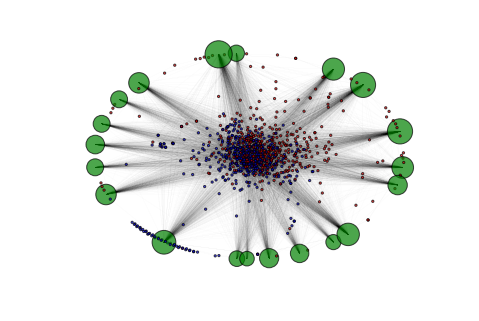

In [37]:
node_color=[G.node[v]["color"] for v in G.nodes()]
d = nx.degree(G)

labels = {}
for x in G.nodes():
    if G.node[x]["color"] == "b" and d[x] > 1:
        labels[x] = x
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, k=1, iterations=10, alpha=0.5)
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels = labels, font_size=16, font_color='c', alpha = 0.5)

nx.draw_spring(G, node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, alpha=0.7, width=0.01, arrows=False)


plt.show()

In [94]:
G = nx.Graph()

def AddUserToSubredditInGraph(graph, dictOfUsersWithSubreddits, nodeColor):
    for user, subreddits in dictOfUsersWithSubreddits.items():
        for user2, subreddits2 in dictOfUsersWithSubreddits.items():
            if user == user2:
                continue
            if graph.has_edge(user,user2):
                continue
            if len(set(subreddits) & set(subreddits2))>20:                
                #graph.add_edge(user, subreddit)
                c1 = 'r'
                c2 = 'r'
                if user in christianity:
                    c1 = 'b'
                if user2 in christianity:
                    c2 = 'b'
                graph.add_node(user, color=c1)
                graph.add_node(user2, color=c2)
                graph.add_edge(user, user2)  
          
    
combined_users = islam.copy()
combined_users.update(christianity)
AddUserToSubredditInGraph(G, combined_users, "r")
#AddUserToSubredditInGraph(G, christianity, "b")

            
node_color=[G.node[v]["color"] for v in G.nodes()]
d = nx.degree(G)

labels = {}
for x in G.nodes():
    if G.node[x]["color"] == "b" and d[x] > 1:
        labels[x] = x
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, k=1, iterations=10, alpha=0.5)
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels = labels, font_size=16, font_color='c', alpha = 0.5)



In [83]:
print len(G.edges())

105386


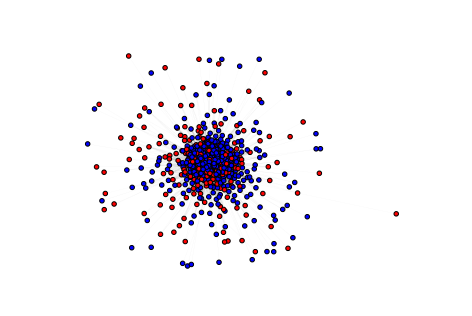

In [80]:
#nx.draw(G, node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, alpha=0.7, width=0.01, arrows=False)
nx.draw_spring(G, node_color = node_color, node_size=[20 for v in G], with_labels=False, width=0.01, arrows=False)
#plt.savefig('./user_to_user.pdf', dpi=300)

plt.show()

In [100]:
import community
part = community.best_partition(G)
#part = {user:(0 if user in christianity else 1) for user in G.nodes() }
mod = community.modularity(part,G)
print mod

0.11714565105


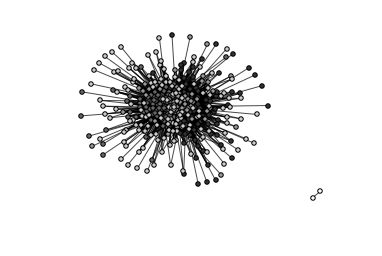

In [104]:
size = float(len(set(part.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(part.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in part.keys() if part[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))


nx.draw_networkx_edges(G,pos, with_labels=False, alpha=0.7,)
plt.axis('off')
plt.savefig('./community_detection.png', dpi=300)
plt.show()

In [96]:
groups = {}
for user, group in part.items():
    if group not in groups:
        groups[group] = []
    groups[group].append(user)
    
for group, users in groups.items():
    print group
    print len(users)
    ccount = 0
    icount = 0
    for user in users:
        if user in christianity:
            ccount += 1
        if user in islam:
            icount += 1
    print "islam: %d" % icount
    print "christianity: %d" % ccount

0
112
islam: 54
christianity: 58
1
110
islam: 42
christianity: 69
2
67
islam: 12
christianity: 56
3
145
islam: 43
christianity: 104
4
2
islam: 0
christianity: 2


In [110]:
subreddit_islam_users = {}
for user, subreddits in islam.items():
    for subreddit in subreddits:
        if subreddit not in subreddit_islam_users:
            subreddit_islam_users[subreddit] = []
        subreddit_islam_users[subreddit].append(user)
        
subreddit_christianity_users = {}
for user, subreddits in christianity.items():
    for subreddit in subreddits:
        if subreddit not in subreddit_christianity_users:
            subreddit_christianity_users[subreddit] = []
        subreddit_christianity_users[subreddit].append(user)

In [112]:
subreddit_all_users  = {}
for subreddit, users in subreddit_christianity_users.items():
    subreddit_all_users[subreddit] = subreddit_christianity_users[subreddit]
    if subreddit in subreddit_islam_users:
        subreddit_all_users[subreddit].extend(subreddit_islam_users[subreddit])
        
for subreddit, users in subreddit_islam_users.items():
    if subreddit in subreddit_islam_users:
        continue
    subreddit_all_users[subreddit] = subreddit_islam_users[subreddit]

In [114]:
print len(subreddit_all_users)

7522


In [44]:
#I = nx.Graph()
#C = nx.Graph()
A = nx.Graph()

def AddUserToSubredditInGraph(graph, dictOfUsersWithSubreddits, nodeColor):
    for subreddit, users in dictOfUsersWithSubreddits.items():
        for subreddit2, users2 in dictOfUsersWithSubreddits.items():
            if subreddit == subreddit2:
                continue
            if graph.has_edge(subreddit,subreddit2):
                continue
            if set(users) & set(users2):                
                #graph.add_edge(user, subreddit)
                graph.add_node(subreddit, color=nodeColor)
                graph.add_node(subreddit2, color=nodeColor)
                graph.add_edge(subreddit, subreddit2)  
            
AddUserToSubredditInGraph(I, subreddit_islam_users, "r")
#AddUserToSubredditInGraph(C, subreddit_christianity_users, "b")
            
#node_color=[G.node[v]["color"] for v in G.nodes()]
#d = nx.degree(G)
#print sorted(d.items(), key = lambda (w, c) : (-c, w))[:5]

#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, k=1, iterations=10, alpha=0.5)
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels = labels, font_size=16, font_color='c', alpha = 0.5)

#nx.draw(G, node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, alpha=0.7, width=0.01, arrows=False)


In [49]:
nx.draw_spring(C,  node_size=5, with_labels=False, distance=5, alpha=0.7, width=0.01, arrows=False)


plt.show()

KeyboardInterrupt: 

In [50]:
Isorted = sorted(nx.degree_centrality(I).items(), key = lambda (w, c) : (-c, w))
Csorted = sorted(nx.degree_centrality(C).items(), key = lambda (w, c) : (-c, w))
print sorted(nx.degree_centrality(I).items(), key = lambda (w, c) : (-c, w))[:25]
print
print sorted(nx.degree_centrality(C).items(), key = lambda (w, c) : (-c, w))[:25]

[('AskReddit', 0.9393761035903473), ('pics', 0.8257798705120659), ('funny', 0.8183245046105553), ('todayilearned', 0.8179321169315283), ('worldnews', 0.8136158524622327), ('videos', 0.7741808907200314), ('WTF', 0.7325877967431823), ('news', 0.6631351775554248), ('gaming', 0.633313713949382), ('aww', 0.62350402197371), ('explainlikeimfive', 0.6121247792819305), ('AdviceAnimals', 0.6030998626643124), ('movies', 0.602511281145772), ('IAmA', 0.5991759858740435), ('gifs', 0.5781832450461055), ('politics', 0.5522856582303316), ('technology', 0.5285462036492055), ('atheism', 0.5140278595252109), ('nottheonion', 0.4565430645477732), ('Showerthoughts', 0.4463409848930744), ('mildlyinteresting', 0.43751226211496963), ('Christianity', 0.43044928389248577), ('AskHistorians', 0.41985481655876006), ('Music', 0.4180890720031391), ('LifeProTips', 0.4139690013733569)]

[('Christianity', 0.9905597659885653), ('AskReddit', 0.9272703097992288), ('pics', 0.8716925940699375), ('funny', 0.8683685680095732), 

In [ ]:
count = 1
for n in [n for (n,c) in Csorted[:50]]:
    print '<b>%d</b> <a href="https://www.reddit.com/r/%s" target="blank"/>%s</a> '%(count,n,n),
    count += 1

In [102]:
ccc = set([n for (n,c) in Csorted[:50]])
iii = set([n for (n,c) in Isorted[:50]])
for p in [p for p in iii if p not in ccc]:
    print p,

MapPorn Fitness Documentaries tifu 4chan reddit.com soccer worldpolitics conspiracy techsupport


In [51]:
CC = C.copy()
II = I.copy()

Cleast = [n for (n,c) in Csorted[50:]]
Ileast = [n for (n,c) in Isorted[50:]]

CC.remove_nodes_from(Cleast)
II.remove_nodes_from(Ileast)

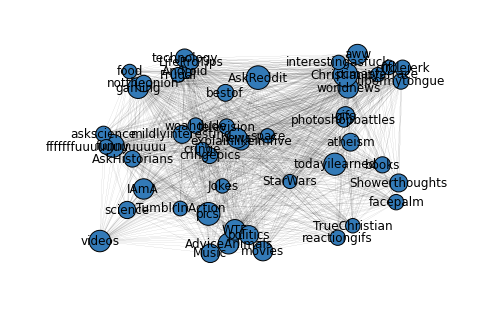

In [73]:
nx.draw_random(CC,  node_size=[(nx.degree_centrality(C)[v]*600) for v in CC], node_color='#337AB7', with_labels=True, distance=5, alpha=1, width=0.05, arrows=False)

plt.savefig('./christianity_centrality.png', dpi=300)
plt.show()

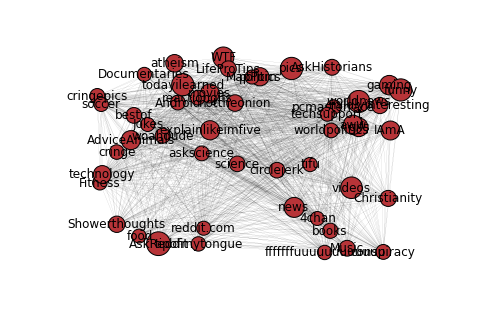

In [74]:
nx.draw_random(II,  node_size=[(nx.degree_centrality(I)[v]*600) for v in II], node_color='#b73438', with_labels=True, distance=5, alpha=1, width=0.05, arrows=False)

plt.savefig('./islam_centrality.png', dpi=300)
plt.show()

#Creating the Community to Subreddit Graph

In [48]:
print len(C.edges())
print len(I)

1046688
5098


In [23]:
H = nx.DiGraph()

In [24]:
H.add_node("Islam", color="r")
H.add_node("Christianity", color="b")
def FromCommunityToSubredditInGraph(graph, dictOfUsersFromSubreddit, name, nodeColor):
    for user in dictOfUsersFromSubreddit.keys():
        for subreddit in dictOfUsersFromSubreddit[user]:
            graph.add_node(subreddit, color="g")
            graph.add_edge(name, subreddit)
FromCommunityToSubredditInGraph(H, islam, "Islam", "r")
FromCommunityToSubredditInGraph(H, christianity, "Christianity", "b")

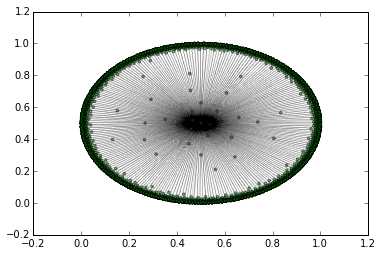

In [25]:
node_color=[H.node[v]["color"] for v in H.nodes()]
f = nx.degree(H)

labels = {}
for x in H.nodes():
    if H.node[x]["color"] == "b" and f[x] > 1:
        labels[x] = x
nx.draw_networkx_nodes(H, pos=nx.spring_layout(H), node_color = node_color, node_size=[(H.in_degree(v)+5) for v in H], with_labels=False, k=1, iterations=10, alpha=0.5)
nx.draw_networkx_edges(H, pos=nx.spring_layout(H), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(H, pos=nx.spring_layout(H), labels = labels, font_size=16, font_color='c', alpha = 0.5)
plt.savefig('./community_to_subreddit.pdf', dpi=300)
plt.show()

#New try

In [28]:
P = nx.Graph()
P.add_node("ISLAM")
P.add_node("CHRISTIANITY")
P.node["ISLAM"]["size"] = 100
P.node["ISLAM"]["color"] = "r"
P.node["CHRISTIANITY"]["size"] = 100
P.node["CHRISTIANITY"]["color"] = "b"

In [29]:
overviewIslam = {}
overviewChristianity = {}
def addToOverview(subredditDict, finalDict):
    for user in subredditDict:
        for subreddit in subredditDict[user]:
            if subreddit not in finalDict:
                finalDict[subreddit] = 1
            else:
                finalDict[subreddit] += 1
addToOverview(islam, overviewIslam)
addToOverview(christianity, overviewChristianity)

**Filter low degree**

In [30]:
overviewFinalIslam = {}
overviewFinalChristianity = {}
def filterLow(inputDict, outputDict, threshold):
    for subreddit in inputDict:
        if inputDict[subreddit] >= threshold:
            outputDict[subreddit] = inputDict[subreddit]
filterLow(overviewIslam, overviewFinalIslam, 50)
filterLow(overviewChristianity, overviewFinalChristianity, 50)
overviewFinalChristianity.pop("Christianity")

749

In [31]:
for subreddit in overviewFinalIslam:
    if subreddit not in P.nodes():
        P.add_node(subreddit, size=overviewFinalIslam[subreddit], color="g")
    else:
        P.node[subreddit]["size"] += overviewFinalIslam[subreddit]
    P.add_edge("ISLAM", subreddit, color="r")
for subreddit in overviewFinalChristianity:
    if subreddit not in P.nodes():
        P.add_node(subreddit, size=overviewFinalChristianity[subreddit], color="g")
    else:
        P.node[subreddit]["size"] = overviewFinalChristianity[subreddit]
    P.add_edge("CHRISTIANITY", subreddit, color="b")


<function matplotlib.pyplot.show>

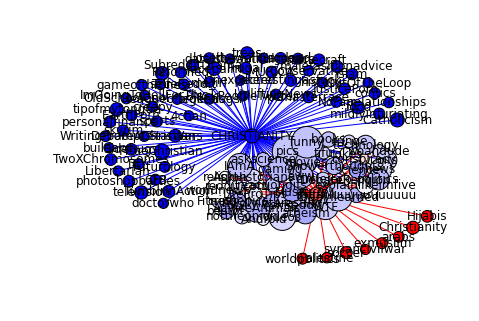

In [32]:

node_color=[P.node[v]["color"] for v in P.nodes()]

def edgecolor(edge):
    return P.get_edge_data(edge[0],edge[1])["color"]

def nodecolor(node):
    returnValue= 0
    if node == "CHRISTIANITY":
        return 300
    elif node == "ISLAM":
        return 50
    else:
        try:
            returnValue = overviewFinalChristianity[node]
        except:
            return 0
        try:
            returnValue = overviewFinalIslam[node]
        except:
            return 300
        
        returnValue = overviewFinalChristianity[node]+overviewFinalIslam[node]
        returnValue = 100*overviewFinalChristianity[node]/returnValue
        returnValue = 300/100*returnValue
        
        return returnValue


#nx.draw_networkx_nodes(P, pos=nx.spring_layout(P), node_size=[P.node[v]["size"]*2 for v in P.nodes()], node_color=node_color)
#nx.draw_networkx_edges(P, pos=nx.spring_layout(P))
#nx.draw_networkx_labels(P, pos=nx.spring_layout(P))
nx.draw_spring(P, node_color = [nodecolor(v) for v in P.nodes()], node_size=[P.node[v]["size"]*2 for v in P.nodes()], with_labels=True, edge_color=[edgecolor(v) for v in P.edges()], cmap=plt.cm.bwr_r)
plt.savefig('./community_to_subreddit.png', dpi=300)
plt.show

In [35]:
for n in P.nodes():
    if n =="ISLAM" or n== "CHRISTIANITY":
        continue
    bors = P.neighbors(n)
    if "ISLAM" in bors and "CHRISTIANITY" in bors:
        print "top_subreddits.addNode('%s', {count: %d, color:'#7B5472'});" %(n,P.node[n]["size"]/40)
        print "top_subreddits.addEdge('Christianity','%s');" %(n)
        print "top_subreddits.addEdge('Islam','%s');" %(n)
    elif "ISLAM" in bors:
        print "top_subreddits.addNode('%s', {count: %d, color:'#b73438'});" %(n,P.node[n]["size"]/10)
        print "top_subreddits.addEdge('Islam','%s');" %(n)
    elif "CHRISTIANITY" in bors:
        print "top_subreddits.addNode('%s', {count: %d, color:'#337AB7'});" %(n,P.node[n]["size"]/10)
        print "top_subreddits.addEdge('Christianity','%s');" %(n)

top_subreddits.addNode('cringepics', {count: 2, color:'#7B5472'});
top_subreddits.addEdge('Christianity','cringepics');
top_subreddits.addEdge('Islam','cringepics');
top_subreddits.addNode('fffffffuuuuuuuuuuuu', {count: 2, color:'#7B5472'});
top_subreddits.addEdge('Christianity','fffffffuuuuuuuuuuuu');
top_subreddits.addEdge('Islam','fffffffuuuuuuuuuuuu');
top_subreddits.addNode('Conservative', {count: 5, color:'#337AB7'});
top_subreddits.addEdge('Christianity','Conservative');
top_subreddits.addNode('dataisbeautiful', {count: 5, color:'#337AB7'});
top_subreddits.addEdge('Christianity','dataisbeautiful');
top_subreddits.addNode('Palestine', {count: 5, color:'#b73438'});
top_subreddits.addEdge('Islam','Palestine');
top_subreddits.addNode('islam', {count: 6, color:'#337AB7'});
top_subreddits.addEdge('Christianity','islam');
top_subreddits.addNode('relationships', {count: 5, color:'#337AB7'});
top_subreddits.addEdge('Christianity','relationships');
top_subreddits.addNode('malefashionadvic

In [21]:
def showDegree(subredditName):
    print "Christianity"
    print overviewFinalChristianity[subredditName]
    print "Islam"
    print overviewFinalIslam[subredditName]
showDegree("technology")

Christianity
122
Islam
113


#Modularity

In [57]:
X = nx.Graph()